In [14]:
import dataset
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

m = 100
xs, ys = dataset.get_beans(m)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We are training a network with one hidden layer like this:

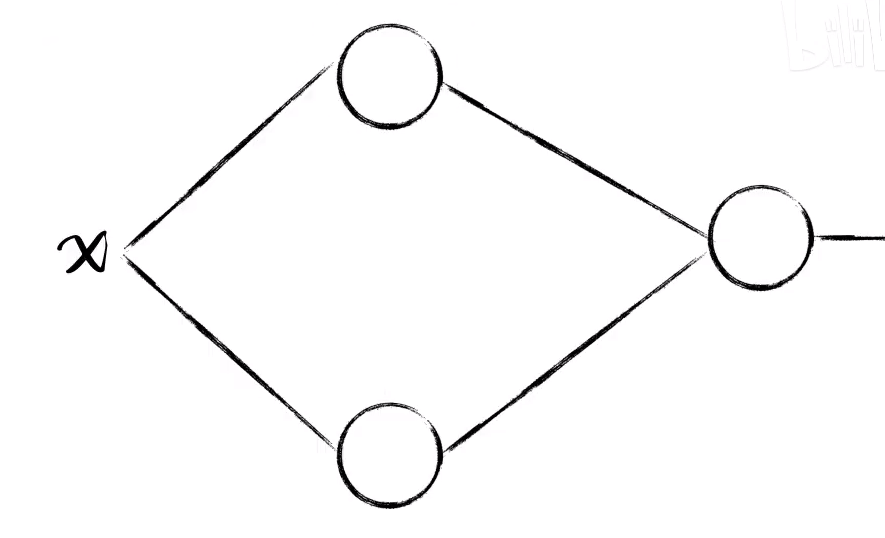

In [15]:
# Stochastic Gradient Descent
# AKA batch size of 1

# Naming convention:
# w = weight
# b = bias
# w12_3 = weight from input 1 to neuron 2 in layer 3
# b2_3 = bias of neuron 2 in layer 3
# z2_3 = weighted sum of inputs to neuron 2 in layer 3
# a2_3 = activation of neuron 2 in layer 3

# first layer
# first neuron
w11_1 = np.random.rand()
b1_1 = np.random.rand()
# second neuron
w12_1 = np.random.rand()
b2_1 = np.random.rand()
# second layer
w11_2 = np.random.rand()
w21_2 = np.random.rand()
b1_2 = np.random.rand()
    
def forward_pass(xs):
    z1_1 = w11_1 * xs + b1_1
    a1_1 = sigmoid(z1_1)
    
    z2_1 = w12_1 * xs + b2_1
    a2_1 = sigmoid(z2_1)
    
    z1_2 = w11_2 * a1_1 + w21_2 * a2_1 + b1_2
    a1_2 = sigmoid(z1_2)
    
    return a1_2, z1_2, a2_1, z2_1, a1_1, z1_1


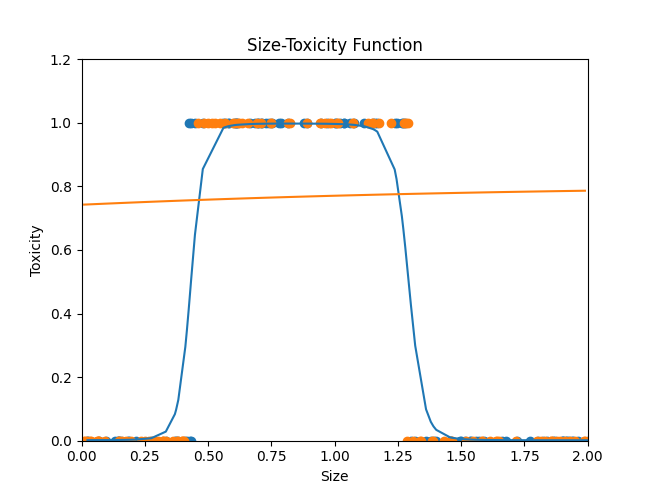

In [16]:
# plot it to sanity check
plt.title("Size-Toxicity Function", fontsize=12)
plt.xlabel("Size")
plt.ylabel("Toxicity")
plt.scatter(xs, ys)

a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = forward_pass(xs)
plt.plot(xs, a1_2)
plt.show()

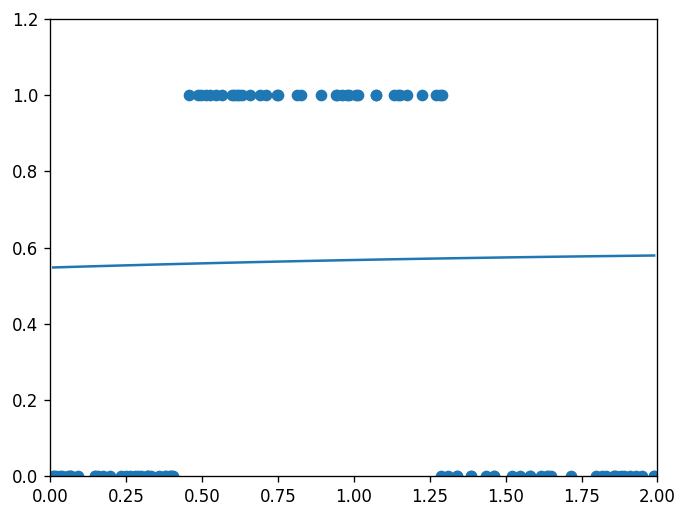

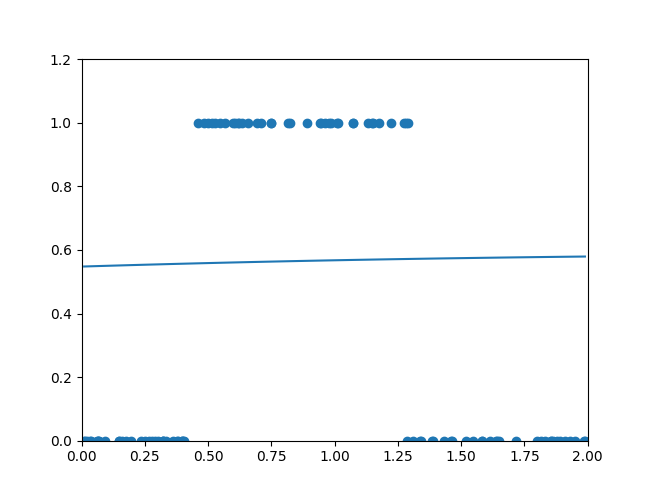

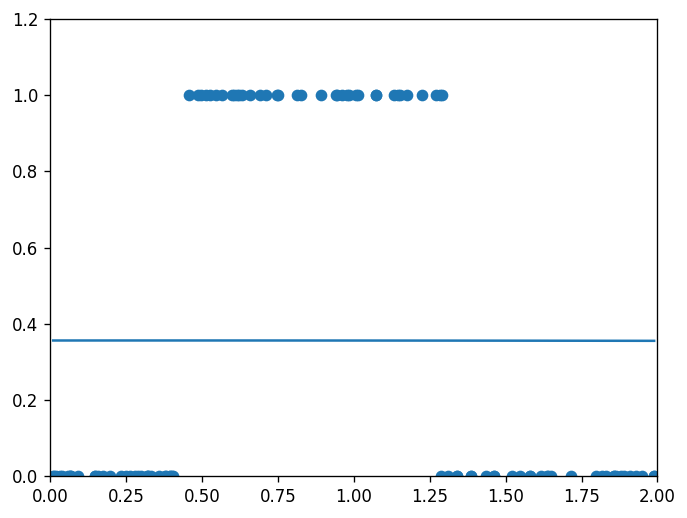

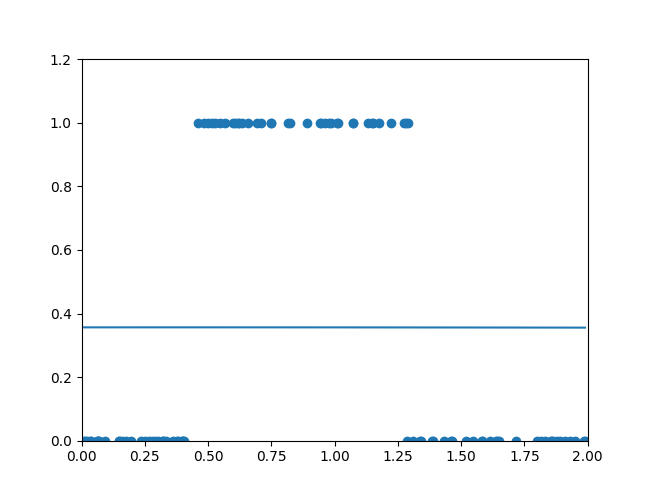

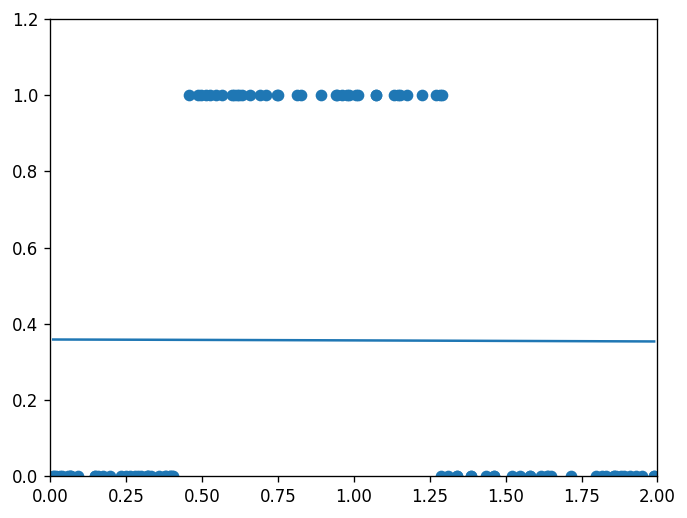

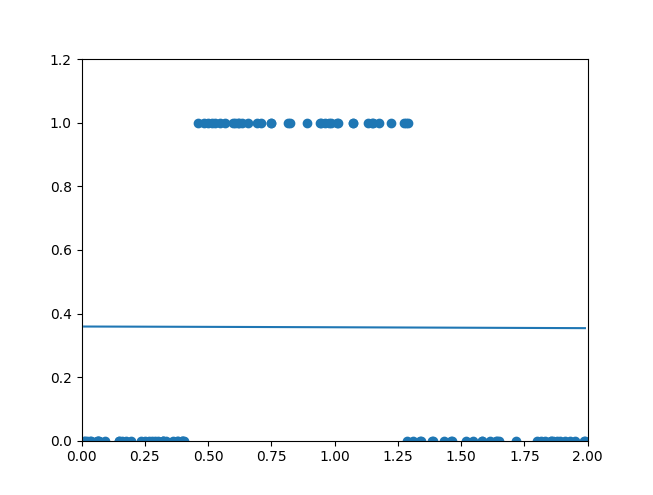

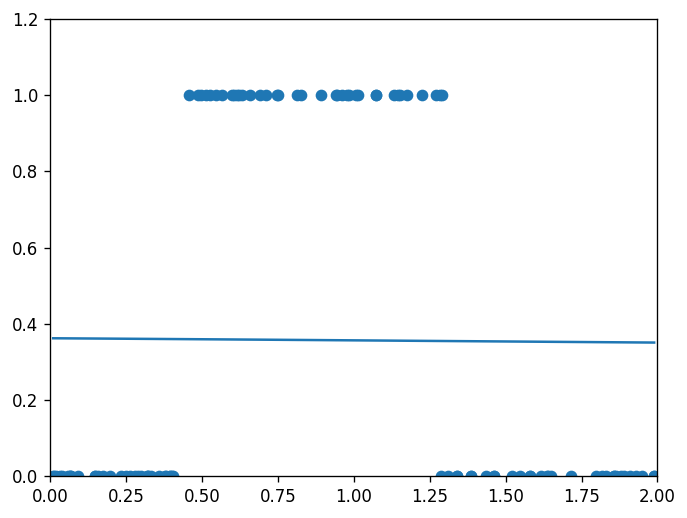

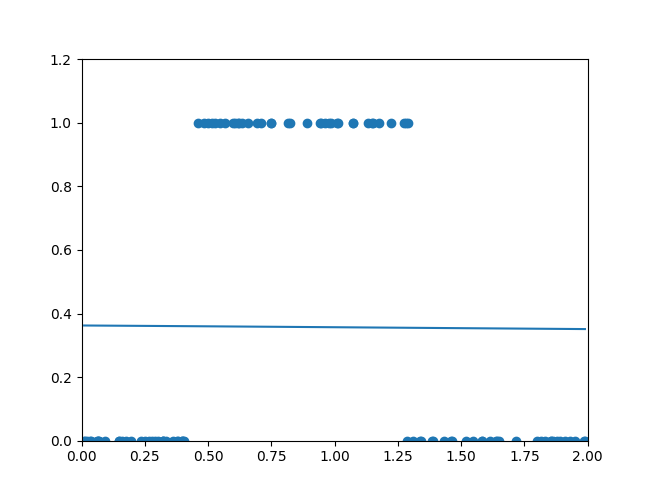

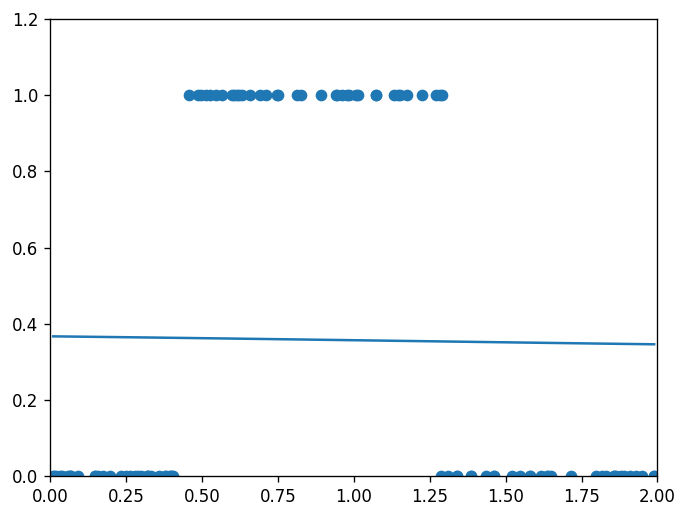

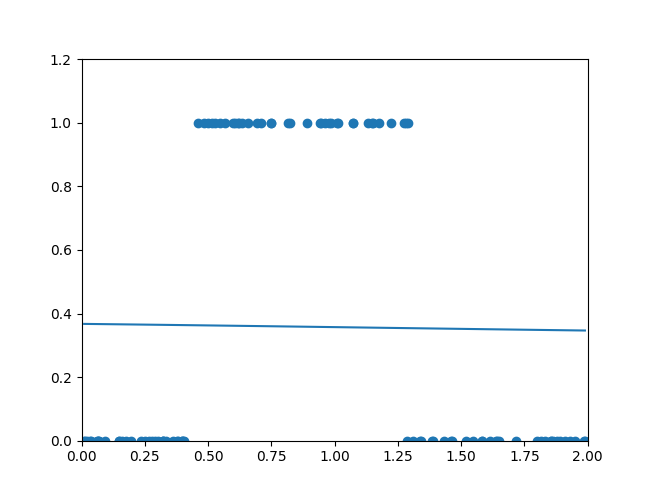

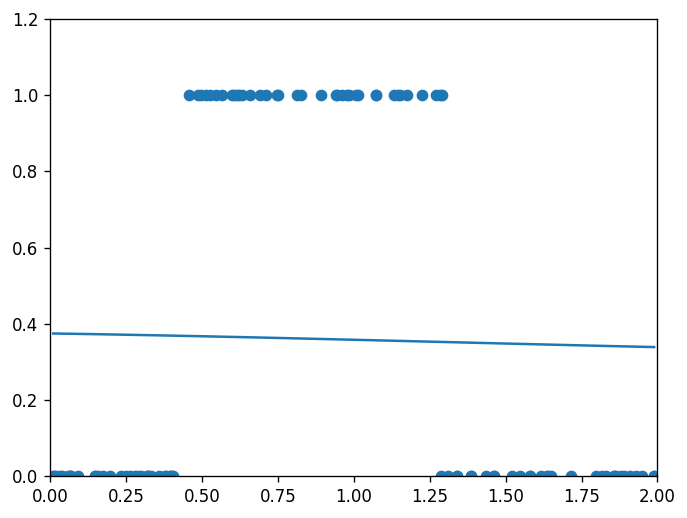

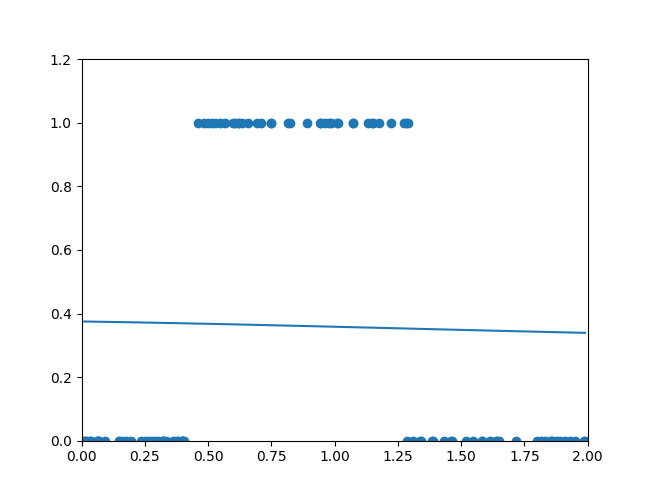

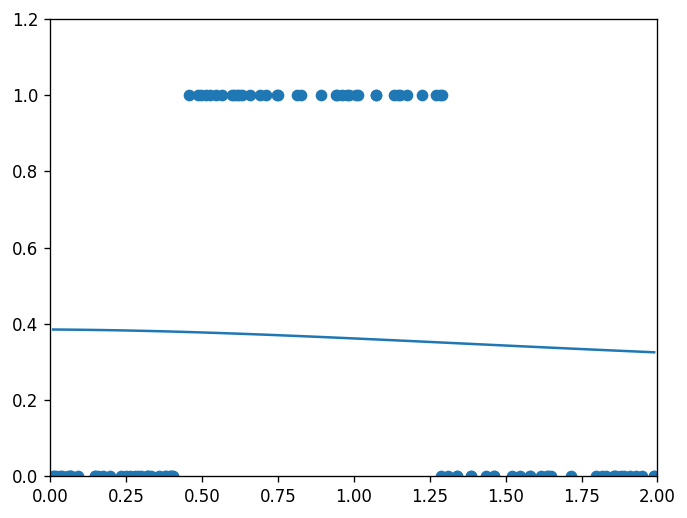

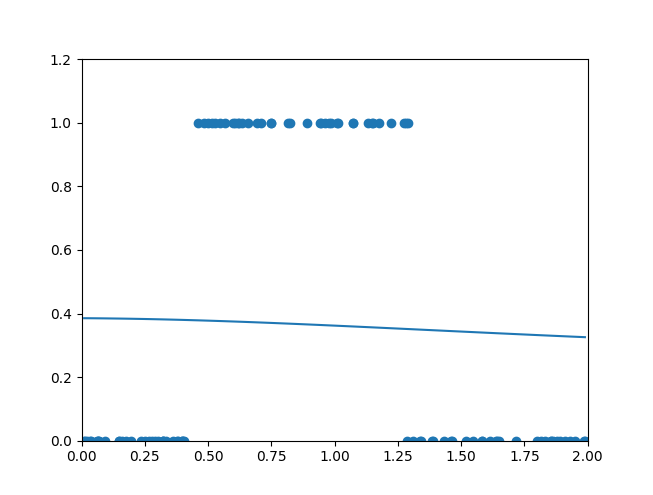

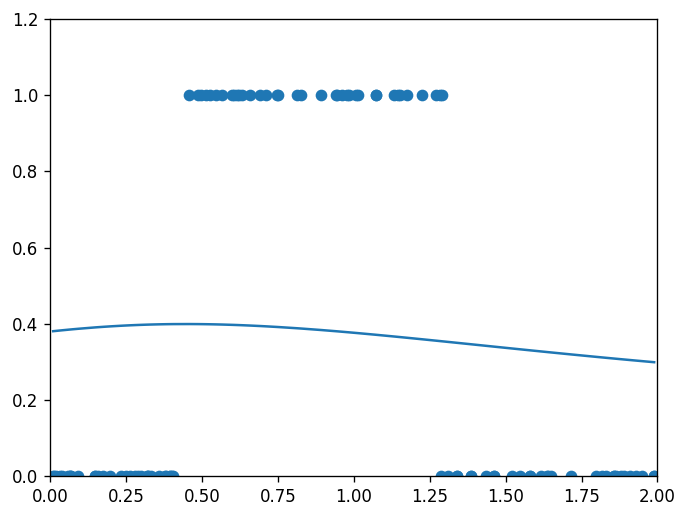

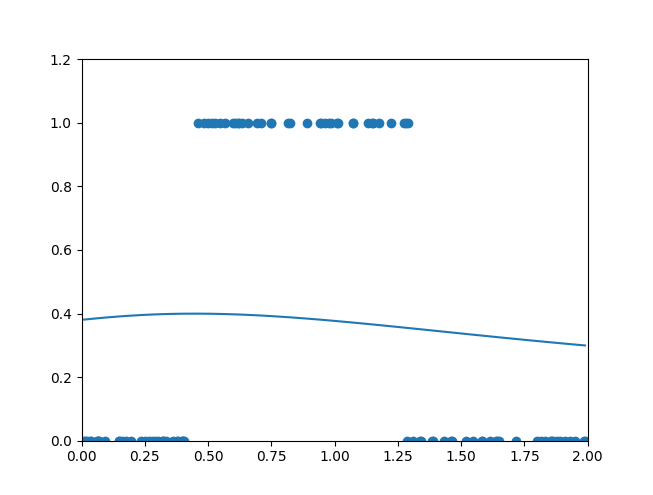

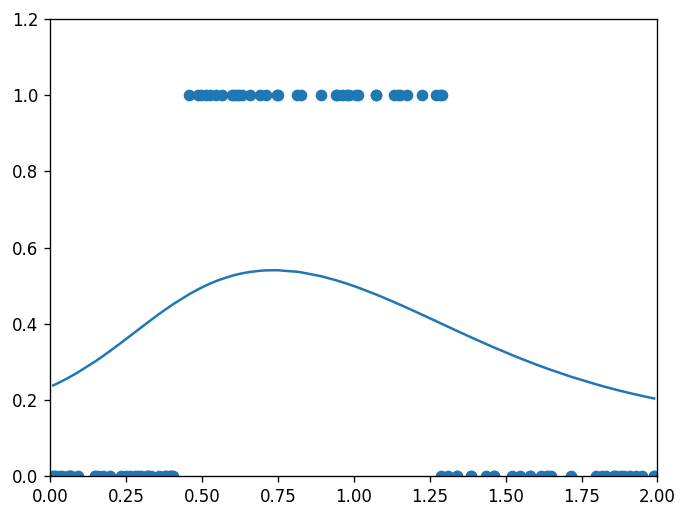

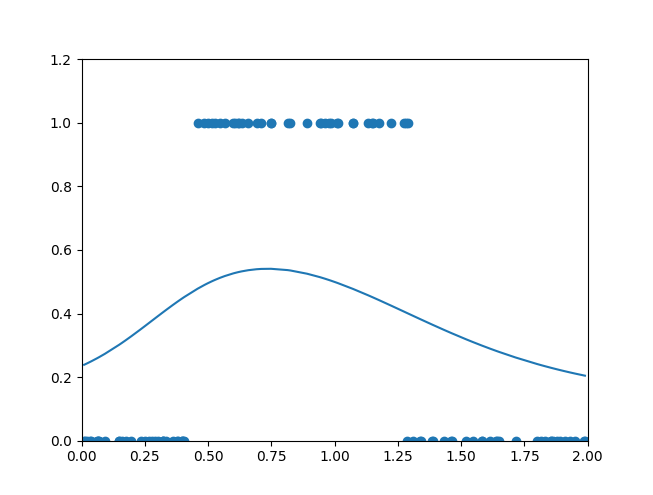

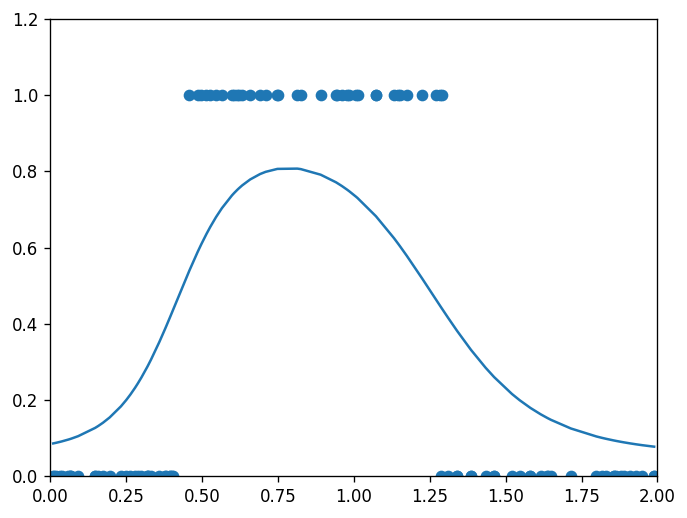

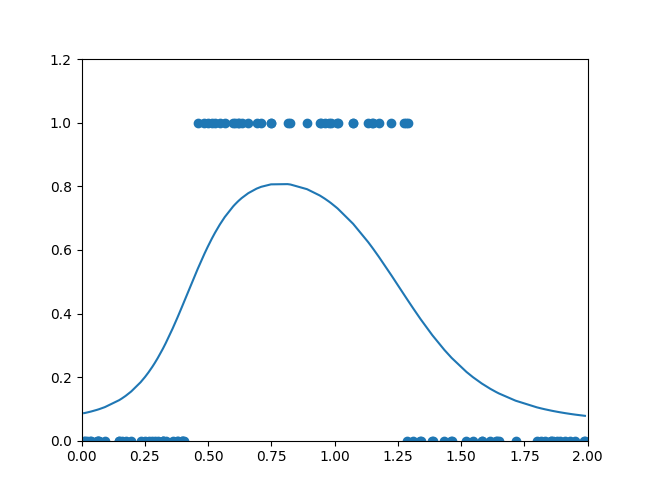

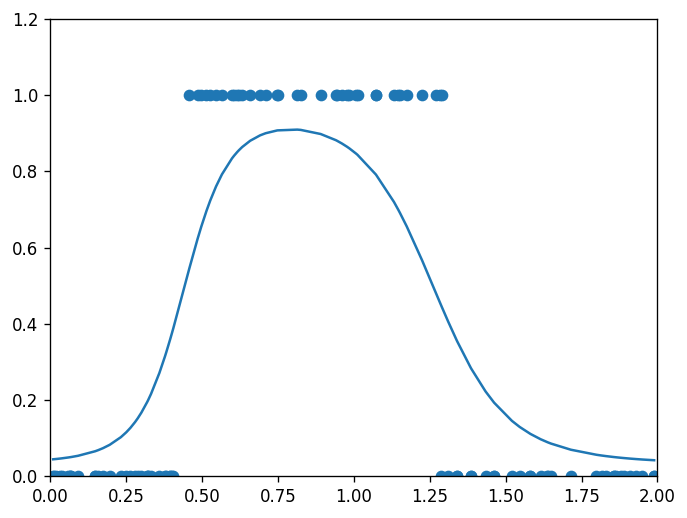

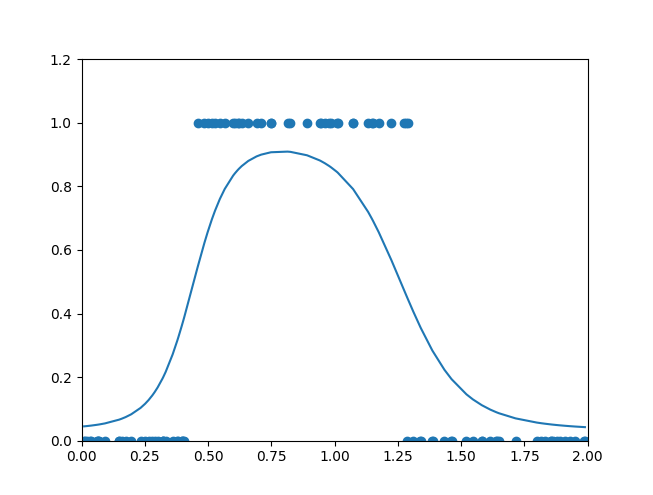

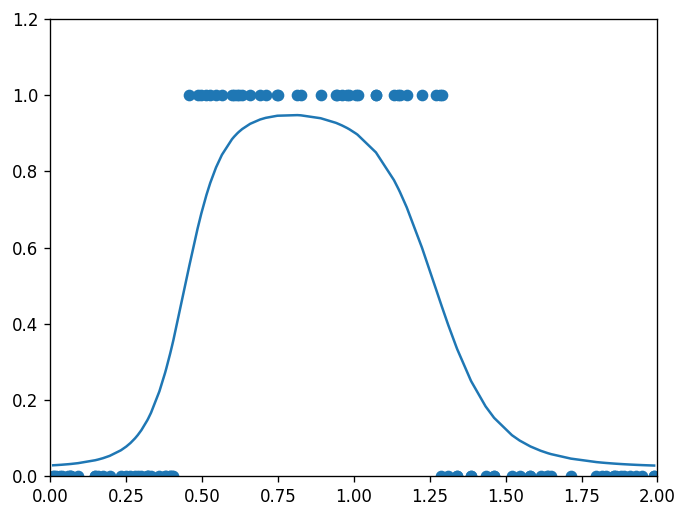

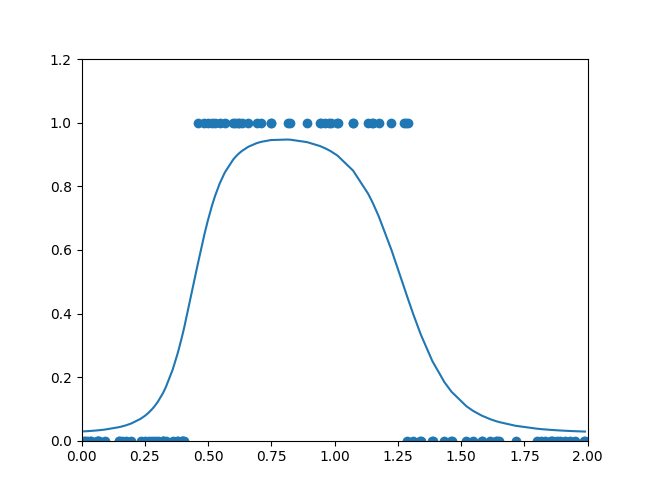

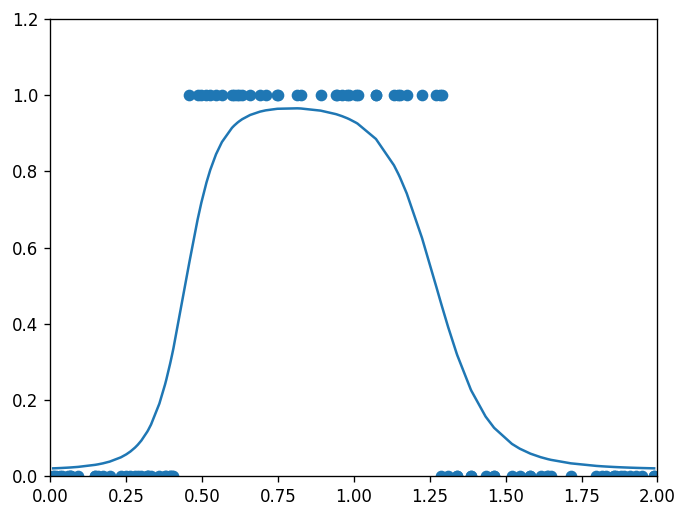

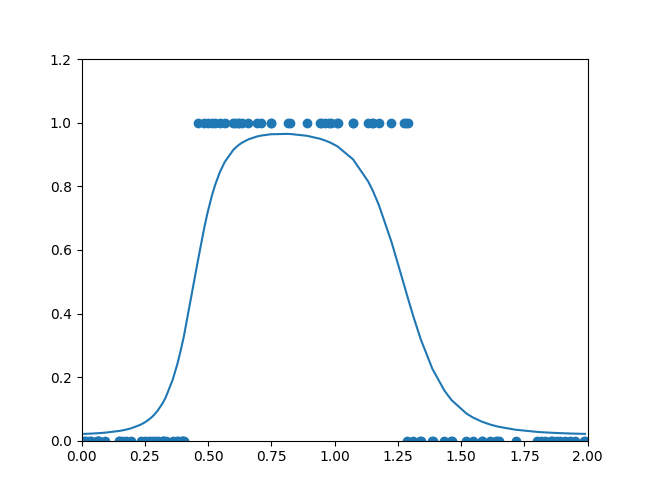

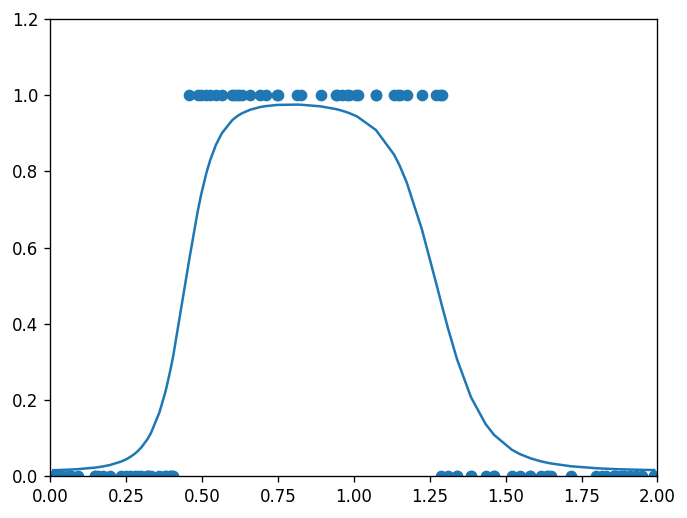

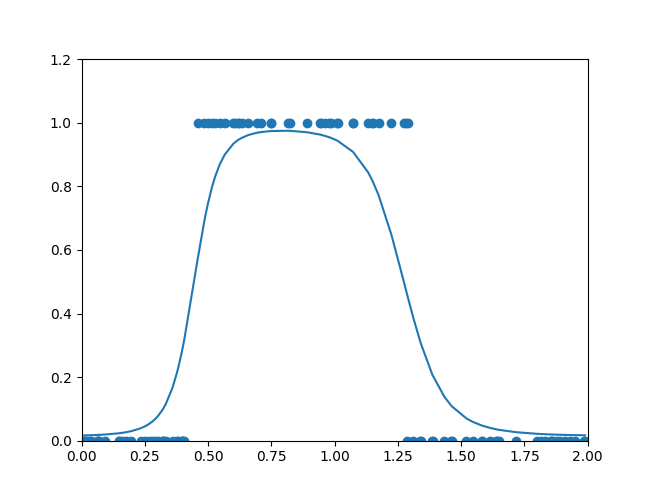

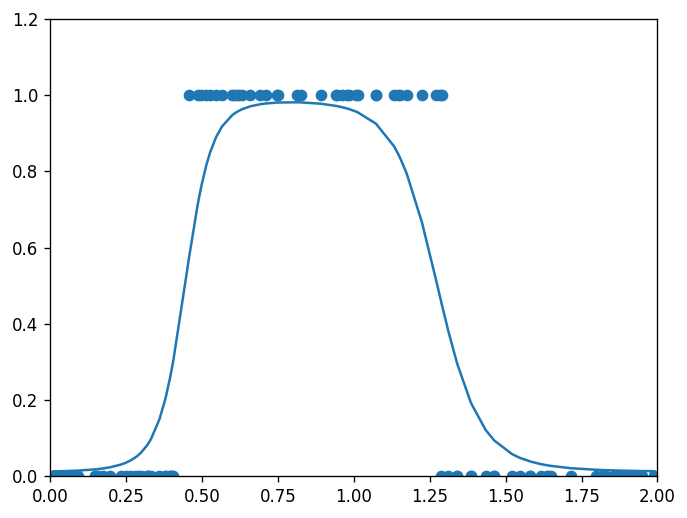

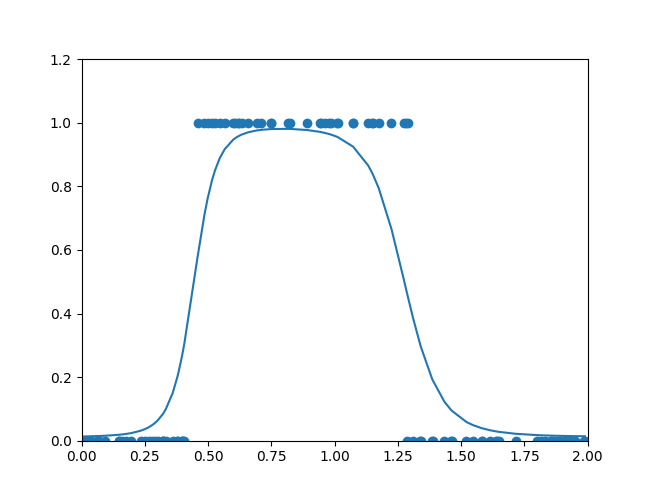

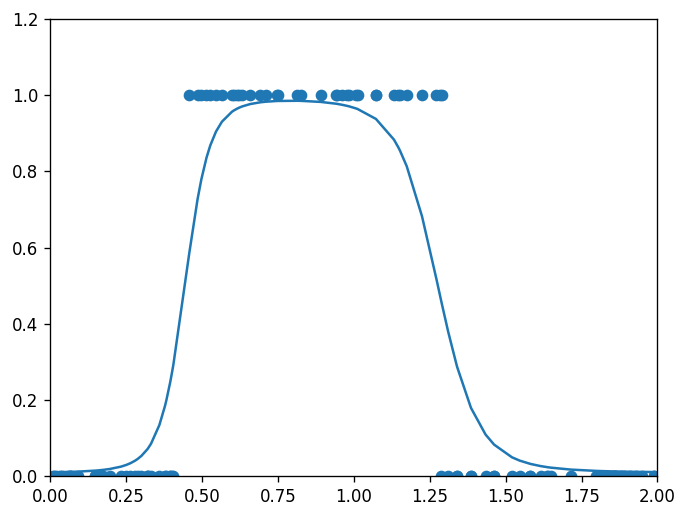

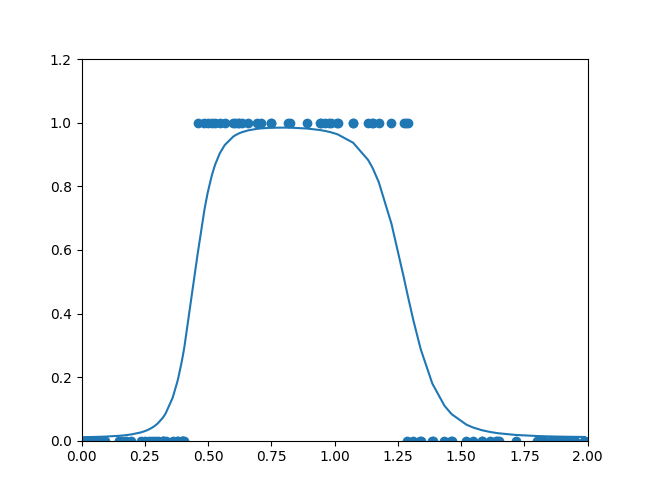

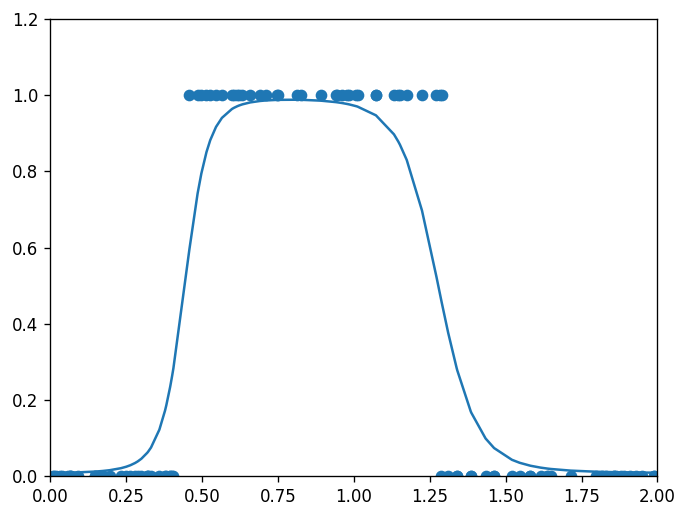

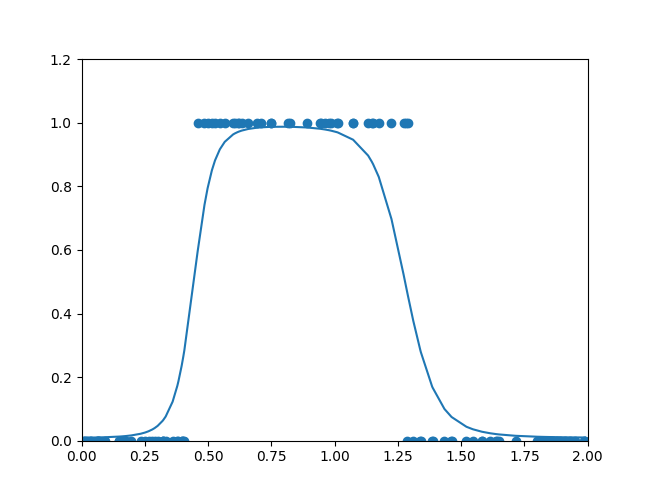

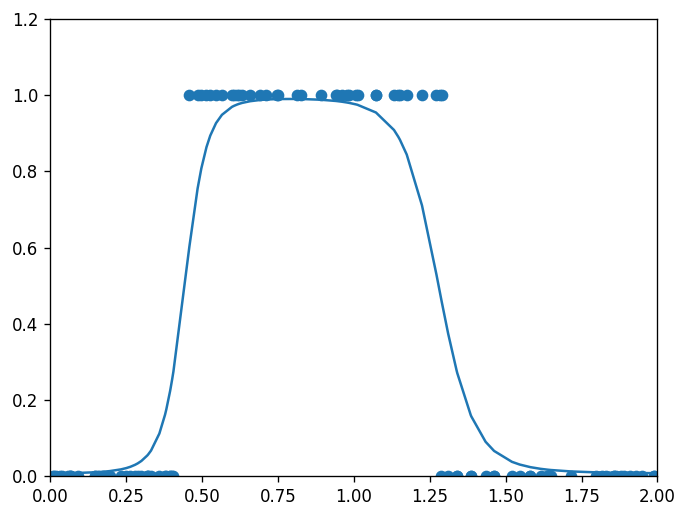

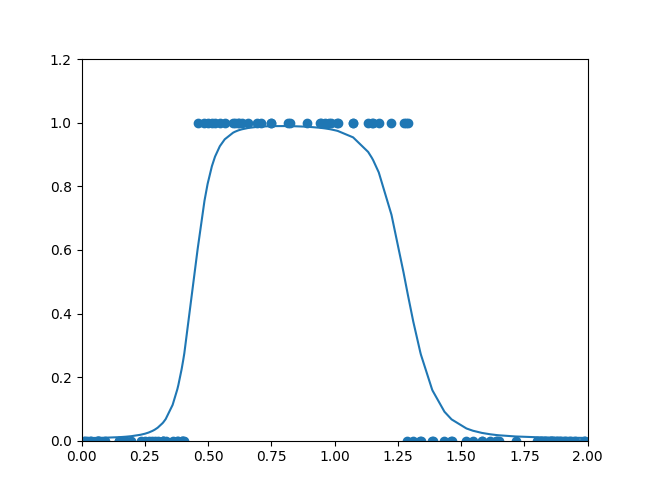

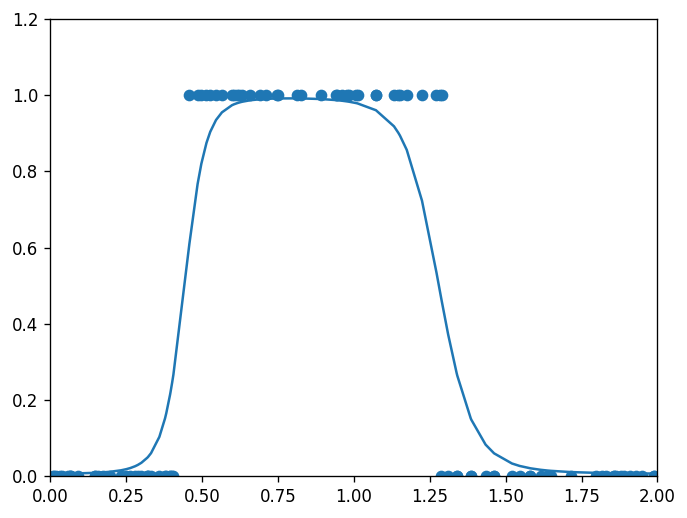

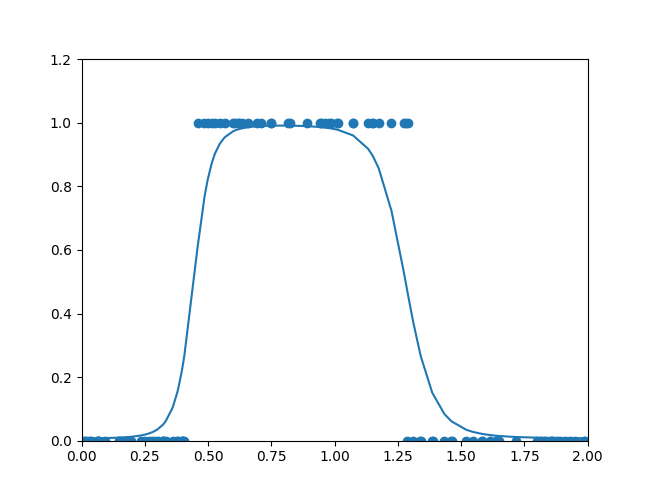

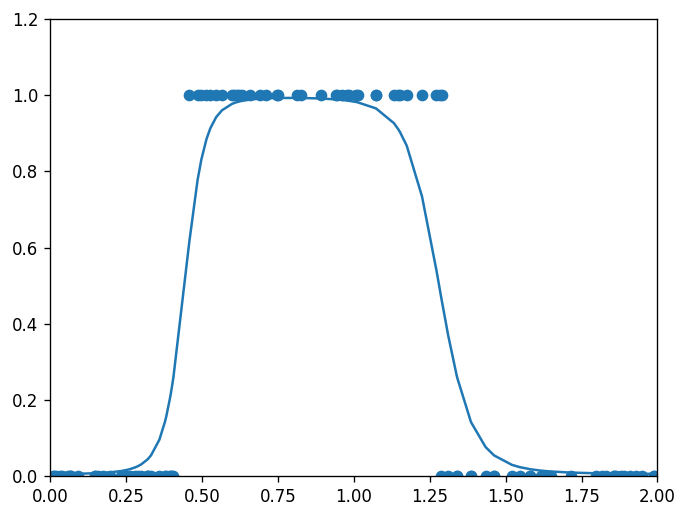

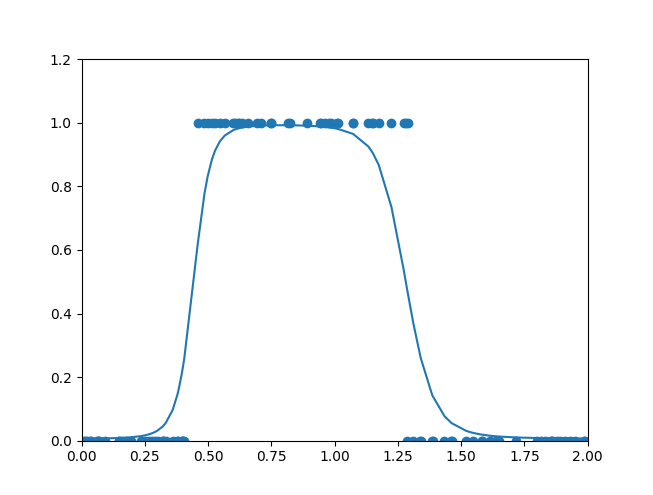

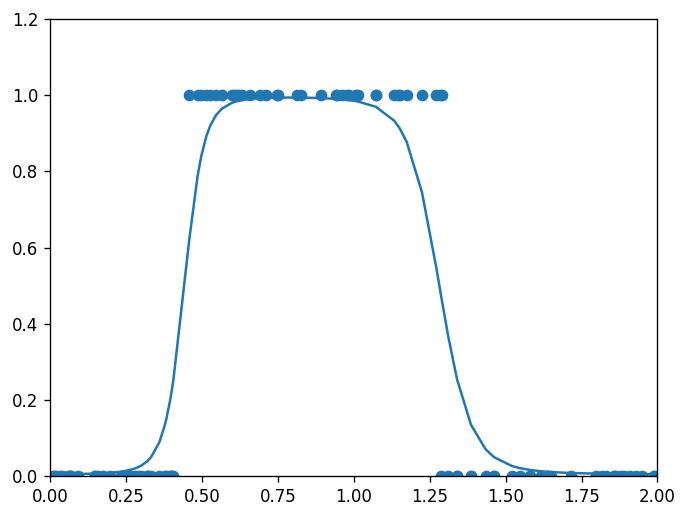

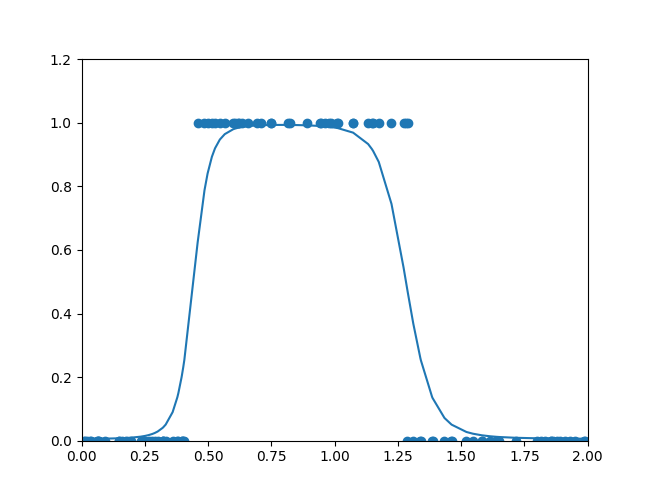

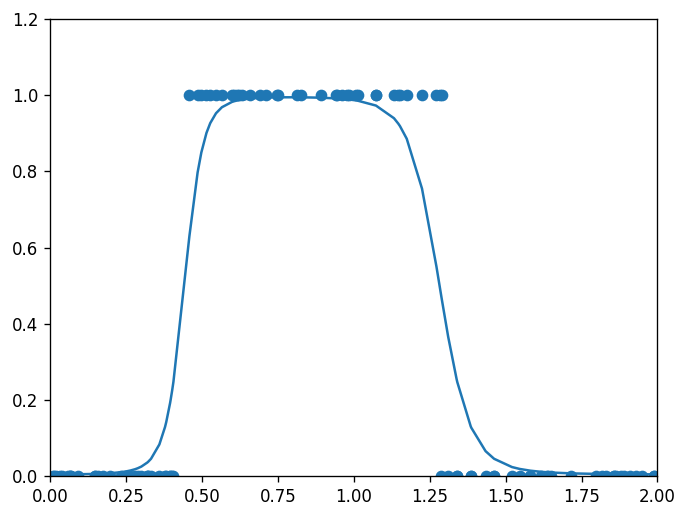

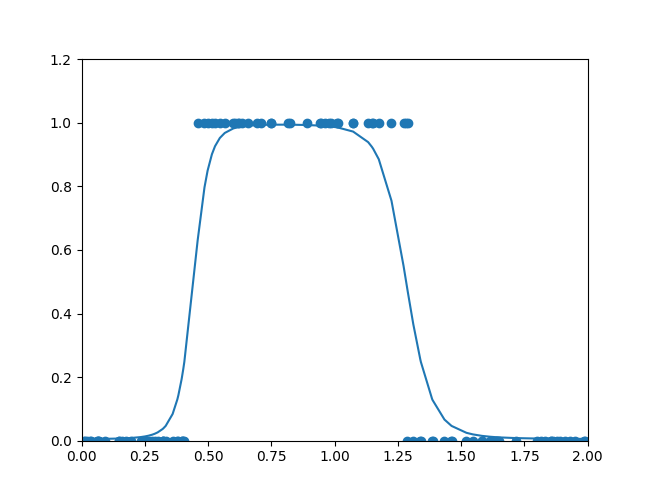

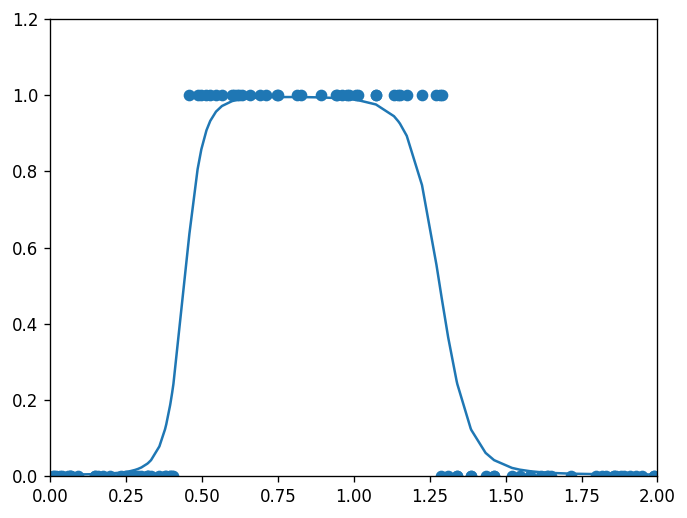

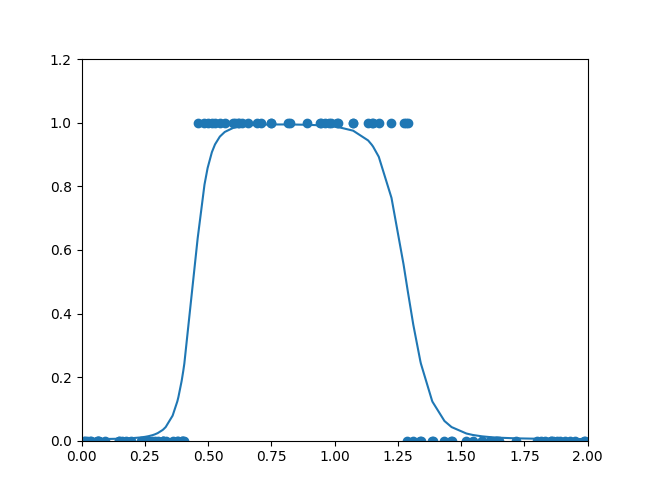

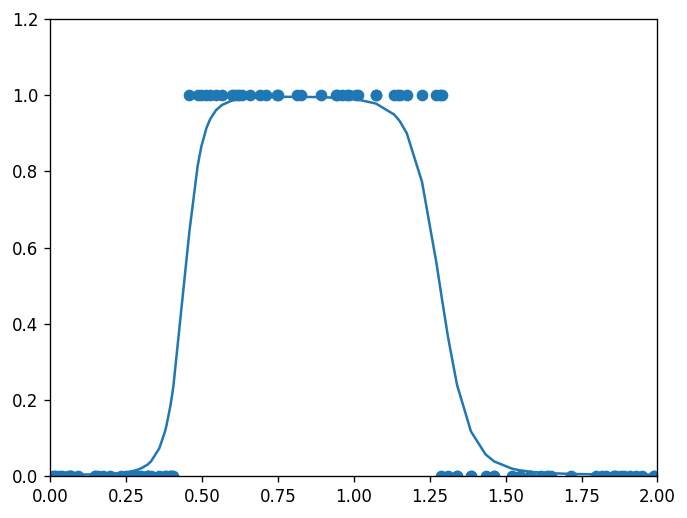

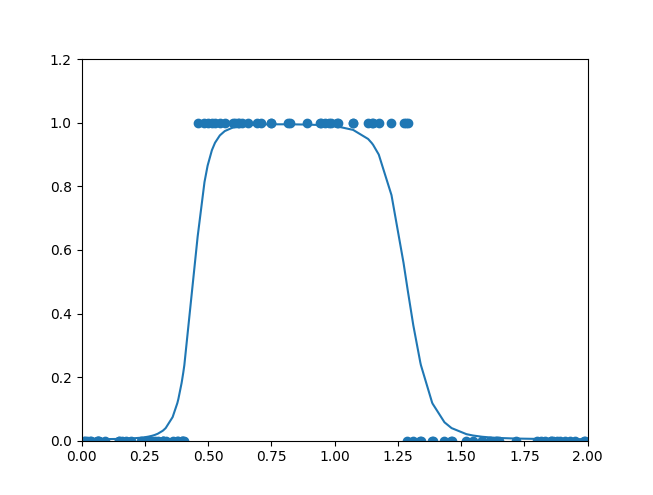

In [17]:


for _ in range(5000):
    for i in range(m):
        x = xs[i]
        y = ys[i]
        
        a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = forward_pass(x)
        # backward propagation
        
        # layer 2
        de__da1_2 = -2 * (y - a1_2)
        da1_2__dz1_2 = a1_2 * (1 - a1_2)
        dz1_2__dw11_2 = a1_1
        dz1_2__dw21_2 = a2_1
        
        # and we found the partial derivative of e with respect to the weights and biases for layer 2, we are done here
        de__dw11_2 = de__da1_2 * da1_2__dz1_2 * dz1_2__dw11_2
        de__dw21_2 = de__da1_2 * da1_2__dz1_2 * dz1_2__dw21_2
        de__db1_2 = de__da1_2 * da1_2__dz1_2
        
        # layer 1 neuron 1
        dz1_2__da1_1 = w11_2
        da1_1__dz1_1 = a1_1 * (1 - a1_1)
        dz1_1__dw11_1 = x
        
        # and the partial derivative of e with respect to the weights and biases for layer 1 neuron 1
        de__dw11_1 = de__da1_2 * da1_2__dz1_2 * dz1_2__da1_1 * da1_1__dz1_1 * dz1_1__dw11_1
        de__db1_1 = de__da1_2 * da1_2__dz1_2 * dz1_2__da1_1 * da1_1__dz1_1
        
        # layer 1 neuron 2
        dz1_2__da2_1 = w21_2
        da2_1__dz2_1 = a2_1 * (1 - a2_1)
        dz2_1__dw12_1 = x
        
        # again, partial derivative of e with respect to the weights and biases for layer 1 neuron 2
        de__dw12_1 = de__da1_2 * da1_2__dz1_2 * dz1_2__da2_1 * da2_1__dz2_1 * dz2_1__dw12_1
        de__db2_1 = de__da1_2 * da1_2__dz1_2 * dz1_2__da2_1 * da2_1__dz2_1
        
        # now we can update the weights and biases
        alpha = 0.03
        w11_1 -= alpha * de__dw11_1
        w12_1 -= alpha * de__dw12_1
        w11_2 -= alpha * de__dw11_2
        w21_2 -= alpha * de__dw21_2
        b1_1 -= alpha * de__db1_1
        b2_1 -= alpha * de__db2_1
        b1_2 -= alpha * de__db1_2
    
    if _%100 == 0:
        try:
            plt.clf()
            plt.scatter(xs, ys)
            plt.xlim(0, 2)
            plt.ylim(0, 1.2)
            
            a1_2, z1_2, a2_1, z2_1, a1_1, z1_1 = forward_pass(xs)
            
            plt.plot(xs, a1_2)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            plt.pause(0.01)
        except KeyboardInterrupt:
            break

plt.show()